# Where is the Best Place for SW Developers to Make Money

## Introduction

Using the data from the Stack Overflow Developer Survey 2019　('https://insights.stackoverflow.com/survey') and OECD average wage data across all industries ('https://data.oecd.org/earnwage/average-wages.htm'), I've dived into those data to answer the following statements;

- Which is the best country from OECD members for SW developers to earn good money?
- How does company size affect SW developer salary by OECD countries?
- Is education level important to make good money for SW developer in OECD countries?


### Read in the data and necessary libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', 250)

In [2]:
df = pd.read_csv('2019_results.csv')

In [3]:
oecd_data =  pd.read_csv('OECD_data190709.csv')

In [4]:
country_region = pd.read_csv('country_region.csv')

### Data Preprocessing

In [5]:
df['Region'] = np.nan

In [6]:
for i,j in country_region.values:
    df['Region'].mask(df['Country'] ==  i, j, inplace = True)

In [7]:
df["OrgSize"].unique()

array([nan, '100 to 499 employees', '10,000 or more employees',
       'Just me - I am a freelancer, sole proprietor, etc.',
       '10 to 19 employees', '20 to 99 employees',
       '1,000 to 4,999 employees', '2-9 employees',
       '500 to 999 employees', '5,000 to 9,999 employees'], dtype=object)

In [8]:
Orgsize_change = {"20 to 99 employees":"20-99","100 to 499 employees":"100-499","10,000 or more employees":"10,000+",
                  "1,000 to 4,999 employees":"1,000-4,999","2-9 employees":"2-9","10 to 19 employees":"10-19","500 to 999 employees":"500-999",
                  "Just me - I am a freelancer, sole proprietor, etc.":"1", "5,000 to 9,999 employees":"5,000-9,999"}  

In [9]:
for i, j in zip(list(Orgsize_change), list(Orgsize_change.values())):
    df['OrgSize'] = df['OrgSize'].str.replace(i,j)

In [10]:
Ed_change = {r"Bachelor’s degree \(BA, BS, B.Eng., etc.\)":'Bachelor',
       r'Master’s degree \(MA, MS, M.Eng., MBA, etc.\)':'Master',
       'Some college/university study without earning a degree':'Others',
       r'Secondary school \(e.g. American high school, German Realschule or Gymnasium, etc.\)':'Others',
       'Associate degree':'Others', r'Other doctoral degree \(Ph.D, Ed.D., etc.\)':'Doctor',
       'Primary/elementary school':'Others', r'Professional degree \(JD, MD, etc.\)':'Doctor',
       'I never completed any formal education':'Others'}

In [11]:
for i, j in zip(list(Ed_change), list(Ed_change.values())):
    df['EdLevel'] = df['EdLevel'].str.replace(i,j)

In [12]:
df['EdLevel'].value_counts().index

Index(['Bachelor', 'Others', 'Master', 'Doctor'], dtype='object')

In [13]:
Ed_order = ['Doctor','Master','Bachelor', 'Others']

In [14]:
OECD = oecd_data.Country
df_oecd = df[df['Country'].isin(OECD.values)]

### Which is the best country from OECD members for SW developers to earn good money?

#### SW developer salary (median) by OECD countries
- Salary converted to annual USD salaries 
- The United States is the highest and Mexico is the lowest

In [15]:
country_income_order = df_oecd.groupby('Country')['ConvertedComp'].median().sort_values(ascending=False).index

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


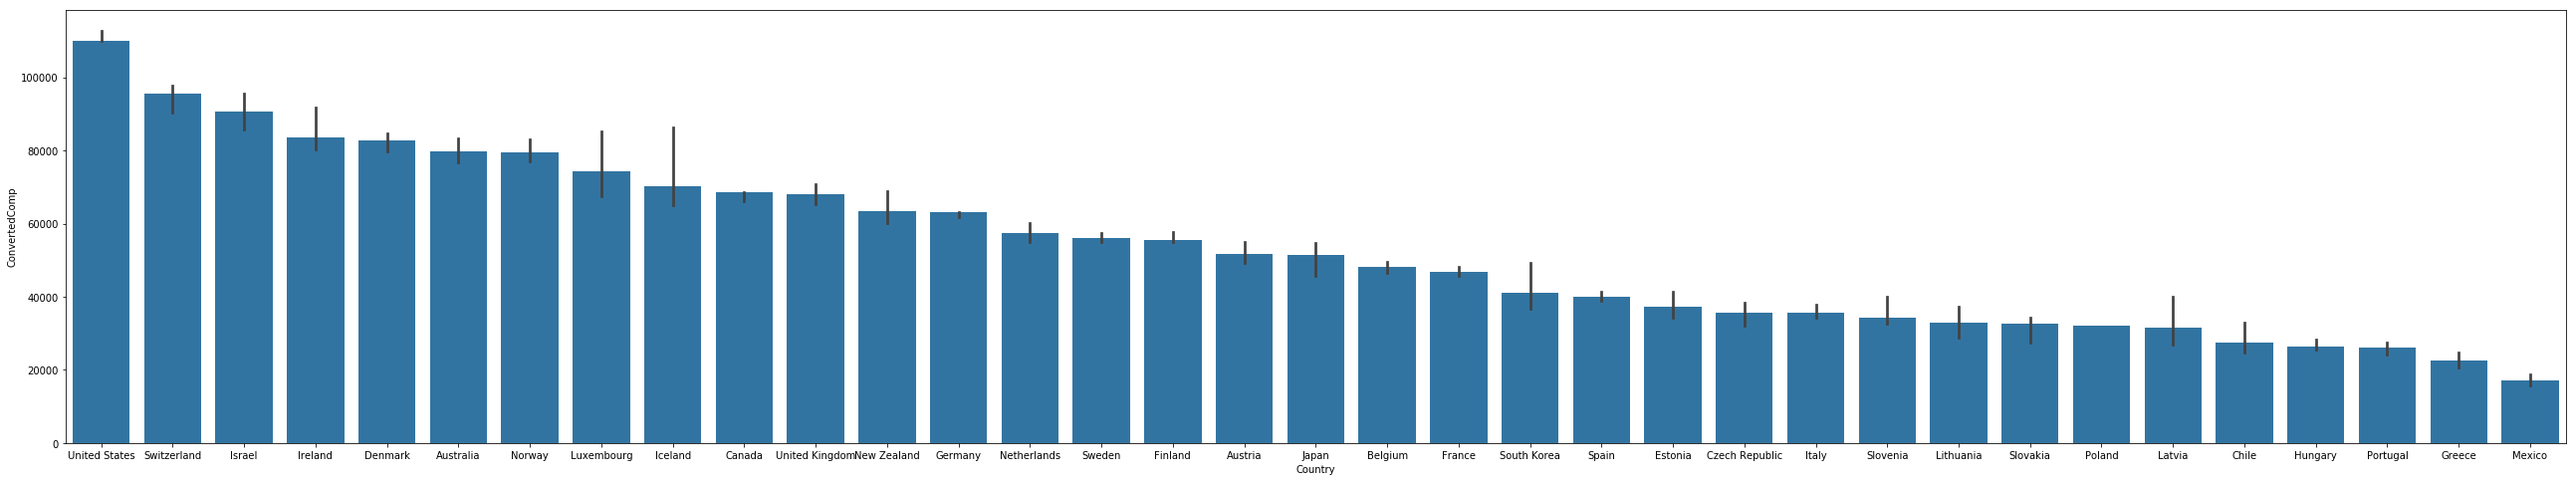

In [16]:
plt.figure(figsize = [45,8])
sns.barplot(x="Country", y="ConvertedComp", color = sns.color_palette()[0],order = country_income_order, data=df_oecd,estimator=median)

In [17]:
df_country_pivot = pd.pivot_table(data=df_oecd, values='ConvertedComp', 
                                  index='Country', aggfunc=np.median)
oecd_average = oecd_data[["Country","Average_Income"]]
oecd_average = oecd_average.set_index('Country')

In [18]:
comp_income_concat = pd.concat([oecd_average, df_country_pivot],axis=1)
comp_income_concat.index.names = ["Country"]
comp_income_concat = comp_income_concat.reset_index()
comp_income_concat = comp_income_concat.sort_values(by="ConvertedComp", ascending = False)
comp_income_concat['Diff'] = comp_income_concat['ConvertedComp'] -comp_income_concat['Average_Income']
comp_income_concat['pc']= comp_income_concat['Diff'] /comp_income_concat['Average_Income']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


- There is a strong positive correlation between SW developer salary("ConvertedComp") and average income("Average_Income") across all industries by countries. 

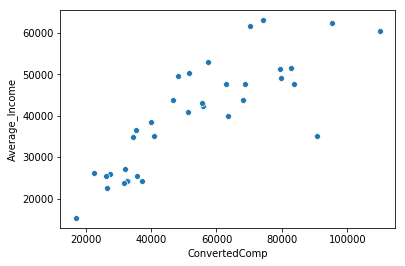

In [19]:
sns.scatterplot(x="ConvertedComp", y="Average_Income",data=comp_income_concat);

In [20]:
comp_income_concat.corr()

,Average_Income,ConvertedComp,Diff,pc
Average_Income,1.000000,0.827558,0.433291,0.183336
ConvertedComp,0.827558,1.000000,0.864520,0.686306
Diff,0.433291,0.864520,1.000000,0.937673
pc,0.183336,0.686306,0.937673,1.000000


- Comparing SW Developer salary and national average income, the difference magnitude varies by countries. SW developer in Israel earns most comparing to the country's national average and English spoken countries such as US, Ireland, Australia, Canala etc. tend to mark higher different rate. 

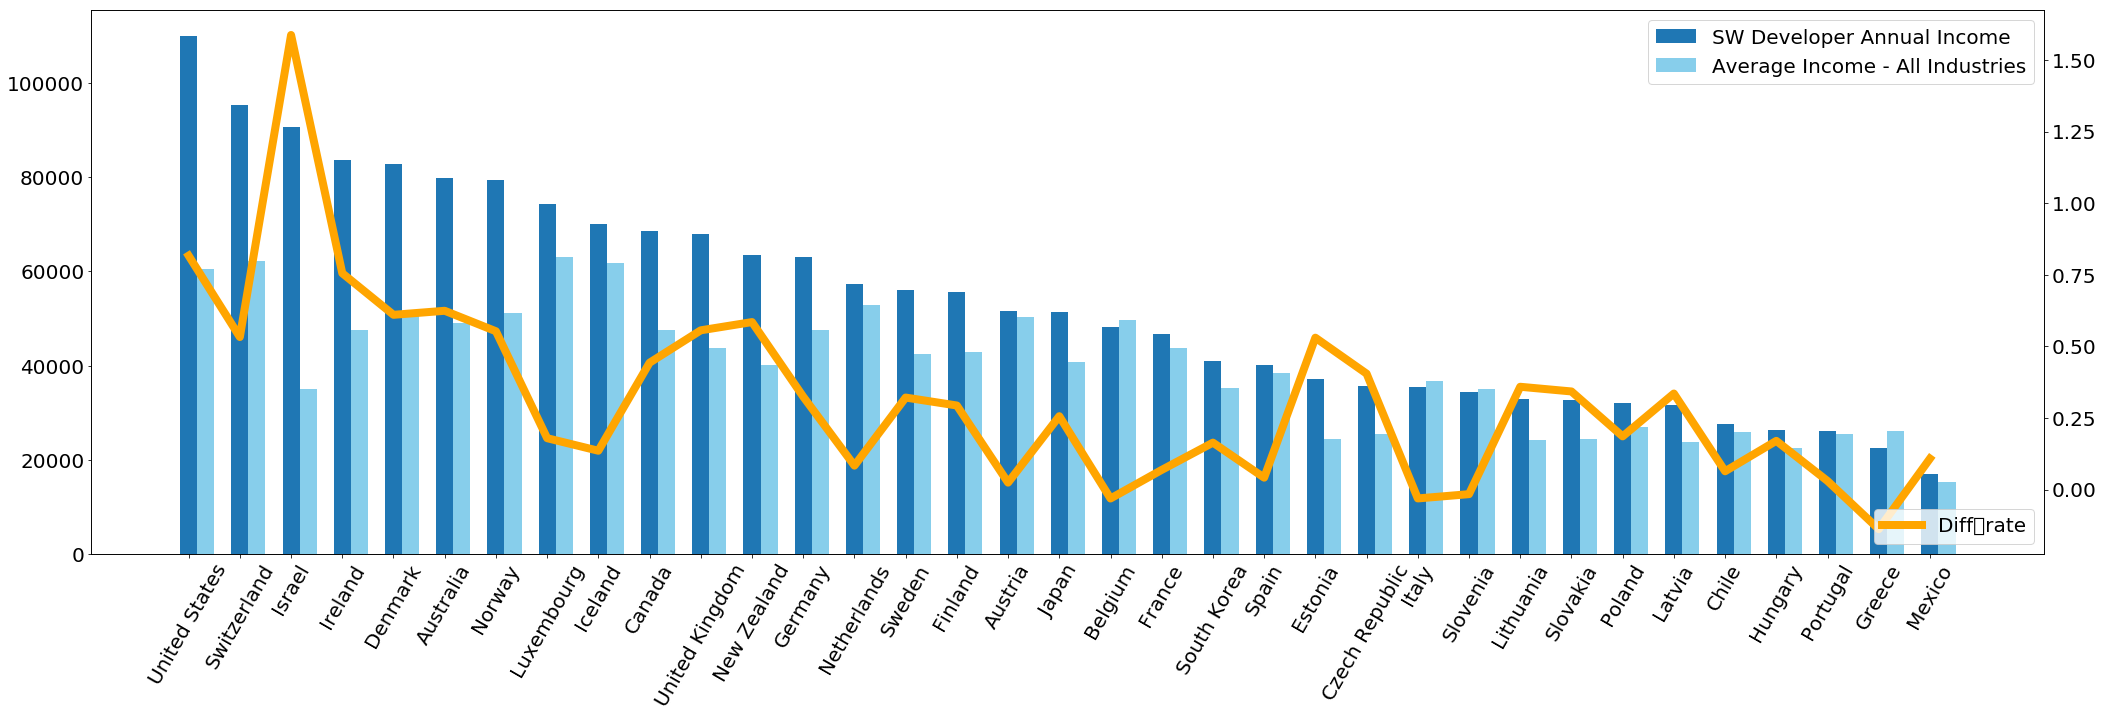

<Figure size 3240x576 with 0 Axes>

In [21]:
x1 = range(0,105,3)
x2 = range(1,105,3)

fig = plt.figure(figsize=(35.0, 10.0))
ax1 = fig.add_subplot(111)
ax1.bar(x1, comp_income_concat['ConvertedComp'], width=1, align="center",label='SW Developer Annual Income')
plt.bar(x2, comp_income_concat['Average_Income'], width=1, align="center",color = "skyblue",label='Average Income - All Industries')
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
ax2 = ax1.twinx()
ax2.plot(x1, comp_income_concat['pc'],linewidth = 8.0,color = "Orange", label = 'Diff　rate')
plt.legend(loc = 'lower right', fontsize=20)
plt.xticks(x1,comp_income_concat['Country'])
plt.yticks(fontsize=20)
labels = ax1.get_xticklabels()
plt.setp(labels, rotation=60, fontsize=20)
plt.figure(figsize = [45,8])
plt.show();

### How does company size affect SW developer salary by OECD countries?

- SW developer annual income by company sizes for all OECD countries.

In [22]:
Org_order = [ '1', '2-9','10-19', '20-99','100-499', '500-999',  '1,000-4,999','5,000-9,999','10,000+']

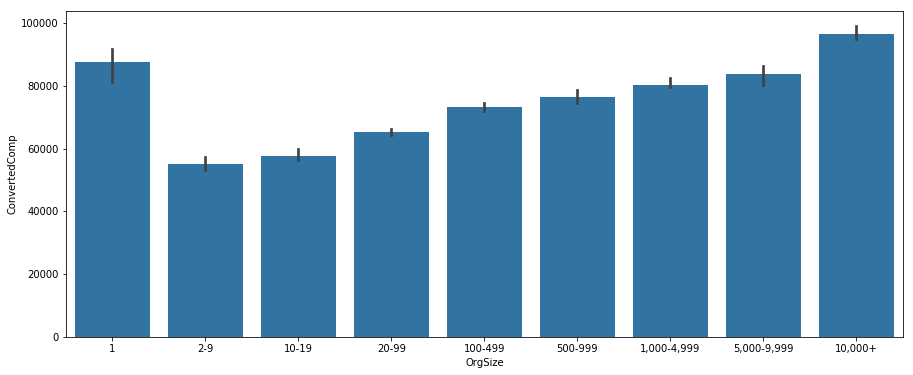

In [23]:
plt.figure(figsize = [15,6])
sns.barplot(x="OrgSize", y="ConvertedComp", order = Org_order, color = sns.color_palette()[0],data=df_oecd,estimator=median);

- Altough there are some ouliers, there is a general tendancy that larger companies pay larger money except freelance　/ self-employed company. 

In [24]:
df_org_pivot2 = pd.pivot_table(data=df_oecd, values='ConvertedComp', 
                                  columns='OrgSize', index='Country', aggfunc=np.median)

In [25]:
df_org_pivot2 = df_org_pivot2.loc[country_income_order,Org_order]
df_org_pivot2 = df_org_pivot2.fillna(0)
df_org_pivot2 = df_org_pivot2.astype(int)

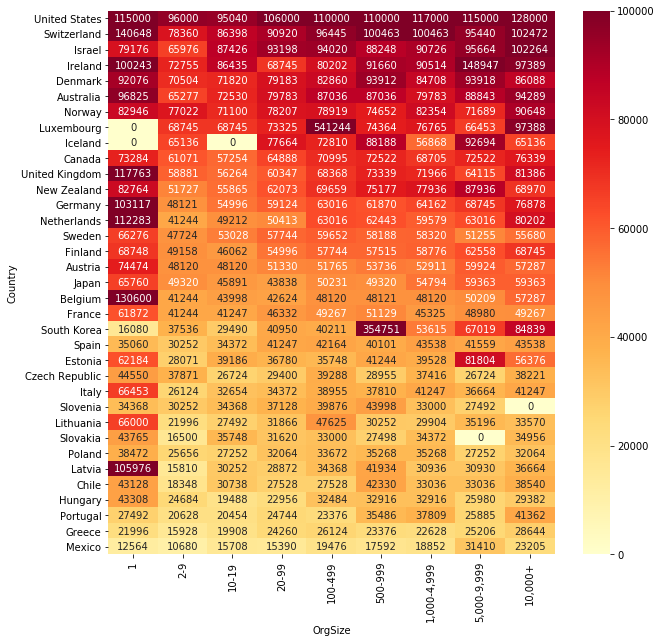

In [26]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_org_pivot2,cmap="YlOrRd", annot=True, fmt="d",vmin=0, vmax=100000);

### Is education level important to make good money for SW developer in OECD countries?

#### There is a clear difference between bachelor or higher education level and undergraduate of college for all OECD countries. On the other hand there is small differences among the degrees of doctor, master and bachelor.

In [27]:
Ed_order = ["Doctor","Master","Bachelor","Others"]

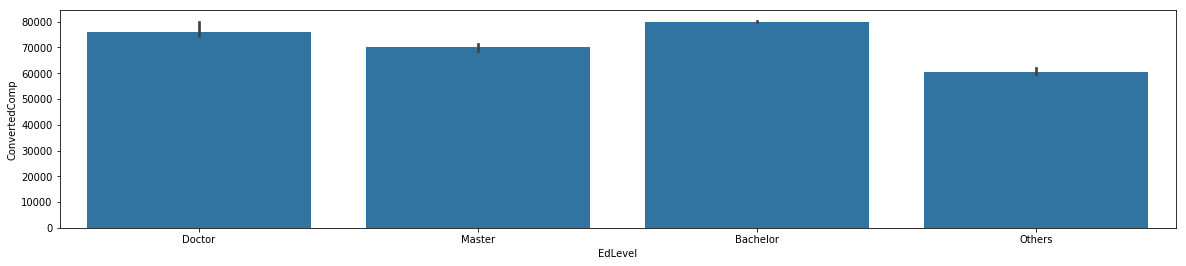

In [28]:
plt.figure(figsize = [20,4])
sns.barplot(x="EdLevel", y="ConvertedComp", color = sns.color_palette()[0],data=df_oecd, order = Ed_order, estimator=median);

#### The SW developer employees who have doctor or master tend to earn highest money in the Most of OECD countries.

In [29]:
df_edlevel_pivot = pd.pivot_table(data=df_oecd, values='ConvertedComp', 
                                  columns='EdLevel', index='Country', aggfunc=np.median)

In [30]:
df_edlevel_pivot = df_edlevel_pivot.fillna(0)
df_edlevel_pivot = df_edlevel_pivot.astype(int)
df_edlevel_pivot  = df_edlevel_pivot.loc[country_income_order,Ed_order]

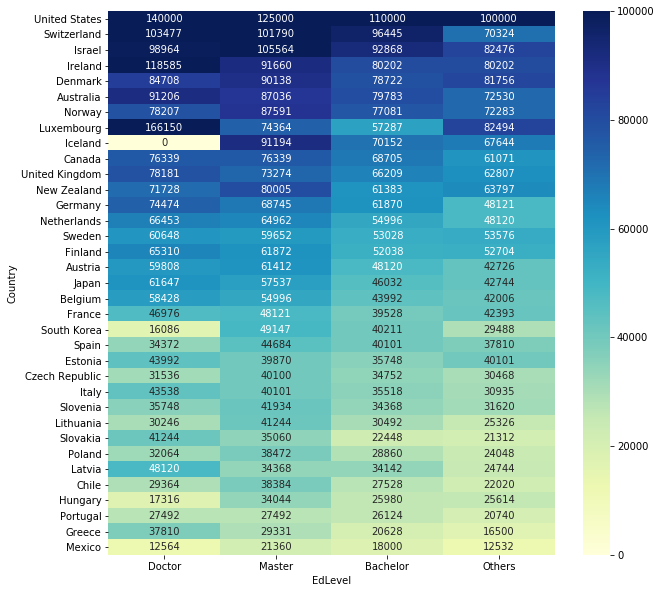

In [31]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_edlevel_pivot,cmap="YlGnBu", annot=True, fmt="d",vmin=0, vmax=100000);